# root_finding_scan_range_method
Jalankan kode pada sel-sel di bawah ini sehingga identitas Anda tertampilkan dengan benar dan carilah akar fungsi dalam suatu rentang yang dipilih.

## identity
Koreksi kode pada sel berikut sehingga identitas Anda benar tertampilkan.

In [1]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

from src.student import Students as stu
nim = 10219020
print(nim, end=' ')
print(stu[nim]['name'], end=' ')
print("https://github.com/", stu[nim]['github'], sep='')

10219020 Jonathan Adriel https://github.com/JonathanAdriel


## function
Sebuah fungsi matematika, misalnya saja

<a name='eqn1'></a>
\begin{equation}\tag{1}
f(x) = \left[ x - 2.5 e^{-1.5(x - 2.4)} \right] \sin \tfrac12 \pi (x-1.25)
\end{equation}

dapat digambarkan dengan dalam rentang $x \in [x_{\rm beg}, x_{\rm end}]$.

In [2]:
import math

# define a function of x
def f(x):
    y1 = (x -  2.5 * math.exp(-1.5*(x - 2.4)))
    y2 = math.sin(2 * math.pi * (x - 1.25) / 4)
    y = y1 * y2
    return y

In [3]:
# create data
xbeg = 0
xend = 10
N = 100
dx = (xend - xbeg) / N

xx = []
yy = []

for i in range(0, N + 1):
    x = xbeg + i * dx
    y = f(x)
    
    xx.append(x)
    yy.append(y)


## scan range method
Suatu rentang $x \in [x_i, x_{i+1}]$ dengan

<a name='eqn2'></a>
\begin{equation}\tag{2}
f(x_i) f(x_{i+1}) < 0,
\end{equation}

memiliki setidaknya satu akar.

Kode <a name='cod1'>1</a>. Mencari rentang-rentang terdapatnya akar.

In [6]:
dx = 0.1

root_range = []

x = xbeg
while x <= xend:
    f1 = f(x)
    f2 = f(x + dx)
    
    if f1 * f2 < 0 and x + dx <= xend:
        a_range = [x, x + dx]
        root_range.append(a_range)
        
    x += dx

print("Root range")
print(root_range)

Root range
[[1.2, 1.3], [2.400000000000001, 2.500000000000001], [3.2000000000000015, 3.3000000000000016], [5.1999999999999975, 5.299999999999997], [7.19999999999999, 7.29999999999999], [9.199999999999983, 9.299999999999983]]


Rentang-rentang yang di dalamnya terdapat akar dapat digambarkan pada fungsi yang sebelumnya pada Persamaan ([1](#eqn1)) seperti pada gambar berikut ini.

Kode <a name='cod2'>2</a>. Menampilkan kurva dan rentang akar-akarnya.

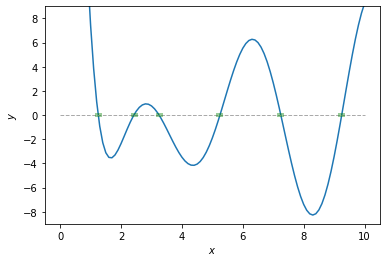

In [7]:
import matplotlib.pyplot as plt

# plot data
plt.ion()
fig, ax = plt.subplots()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_ylim([-9, 9])
plt.plot(xx, yy)

# draw horizontal line
line = plt.Line2D((xbeg, xend), (0, 0), color='#aaaaaa', lw=1, ls='dashed')
plt.gca().add_line(line)

# draw root range
for r in root_range:
    x1 = r[0]
    x2 = r[1]
    line = plt.Line2D((x1, x2), (0, 0), color='g', alpha=0.4, lw=4)
    plt.gca().add_line(line)

# show plot result
plt.show()

Modifikasi Kode [1](#cod1) dan [2](#cod2) yang diberikan sehingga penggambaran rentang-rentang terdapatnya akar menjadi lebih tepat.

## secant method
Dalam suatu rentang pencarian $x_i \le x \le x_{i+1}$ yang diharapkan terdapat satu akar hubungan iteratif

<a name='eqn3'></a>
\begin{equation}\tag{3}
x_{i+2} = x_{i+1} - f(x_{i+1}) \frac{x_{i+1} - x_i}{f(x_{i+1}) - f(x_i)}
\end{equation}

yang dikenal dengan metode secant, akan memberikan perkiraan akar $x_{\rm root} \approx x_{N}$ dengan $N > 2$.

Kode <a name='cod3'>3</a>. Menentukan rentang yang digunakan untuk mencari akar.

In [38]:
# set range for secant method
n =5                           #n divariasikan 0,1,2,3,4,5 
x1 = root_range[n][0]
x2 = root_range[n][1]
print("xbeg = ", x1)
print("xend = ", x2)

xrange1 = x1
xrange2 = x2


    

xbeg =  9.199999999999983
xend =  9.299999999999983


Kode <a name='cod4'>4</a>. Mencari akar dalam rentang yang dipilih dengan metode secant.

In [39]:
# search root
eps = 1E-3
err = 1

root = ''

while abs(err) > eps:
    x3 = x2 - f(x2) * (x2 - x1) / (f(x2) - f(x1))
    
    err = abs(f(x3))
    
    x1 = x2
    x2 = x3
    
    root = x3

print("root = ", root)

root =  9.249998821611408


Kode <a name='cod5'>5</a>. Menggambarkan akar yang diperoleh dari pencarian akar.

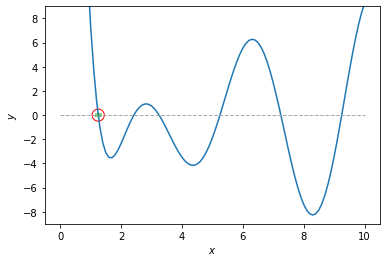

In [29]:
# draw result
from matplotlib.patches import Ellipse

# plot data
plt.ion()
fig, ax = plt.subplots()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_ylim([-9, 9])
plt.plot(xx, yy)

# draw horizontal line
line = plt.Line2D((xbeg, xend), (0, 0), color='#aaaaaa', lw=1, ls='dashed')
plt.gca().add_line(line)

# draw root range
line = plt.Line2D((xrange1, xrange2), (0, 0), color='g', alpha=0.4, lw=4)
plt.gca().add_line(line)

# draw root position
point = Ellipse(
    xy=(root, 0), width=0.4, height=1, 
    edgecolor='r', fc='None', lw=1
)
plt.gca().add_patch(point)

# show plot result
plt.show()

Modifikasi Kode [1](#cod1), [2](#cod2), [3](#cod3), [4](#cod4), dan [5](#cod5) sehingga satu per satu dapat diperoleh semua akar dari Persamaan ([1](#eqn1)). Kemudian lengkapi tabel berikut ini.

Tabel <a name='tab1'>1</a> Akar-akar dari Persamaan ([1](#eqn1)).

n   | x1  | x2  | root
:-: | :-: | :-: | :-:
0   | 1.2 | 1.3 |   1.2500029670299357
1   |    2.400000000000001 |     2.500000000000001  |  2.4211443453893393
2   |   3.2000000000000015   | 3.3000000000000016   | 3.2499256146863793
3   |   5.1999999999999975  | 5.299999999999997    |  5.249995479687406
4   |   7.19999999999999  |   7.29999999999999  | 7.249997975796951
5   |    9.199999999999983  |  9.299999999999983   | 9.249998821611408